# YOLOv7

YOLOv7은 효율적인 구조(E-ELAN), 모델 재파라미터화, 동적 라벨링, Trainable Bag-of-Freebies 기법 등 다양한 최적화 기법을 종합적으로 결합해 높은 정확도와 추론 성능을 동시에 달성한 모델입니다.

https://arxiv.org/pdf/2207.02696

## YOLOv7의 특징

### 1. 확장된 효율적 계층 병합 구조 (Extended-ELAN)

기존 YOLOv5 등에서 사용된 ELAN 구조를 확장한 E-ELAN(Extended-ELAN) 구조를 채택하여, 더 깊고 넓은 특징(feature)을 효율적으로 추출합니다.

여러 레이어의 특징을 더 다양한 방식으로 병합하여, 효율적으로 많은 정보를 유지하면서도 정보 손실을 최소화합니다.

얕은 레이어와 깊은 레이어의 특징을 더 많이 재사용하면서, 모델의 학습 능력을 극대화합니다.

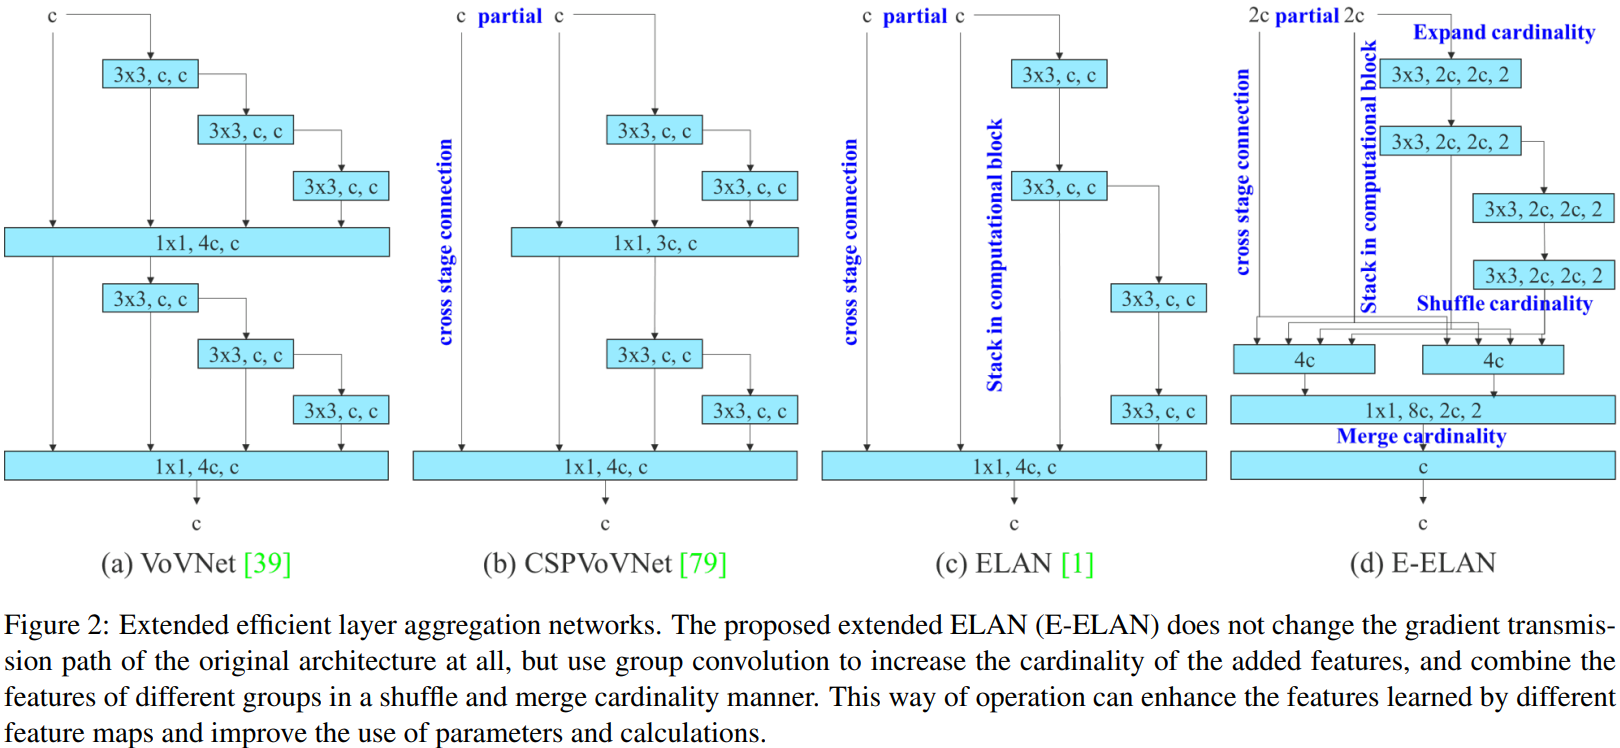

### 2. 모델 재파라미터화 기법 (Model Re-parameterization)



학습 과정과 추론 과정에서 사용하는 네트워크 구조를 서로 다르게 구성하여, 학습 단계에서는 복잡한 구조로 학습하지만, 추론 단계에서는 간단한 구조로 재구성(re-parameterization)하여 높은 속도를 유지합니다.

훈련 과정에서 복잡하고 다양한 구조(예: 여러 개의 Conv레이어 분리 사용)로 성능을 향상시키고,

추론 단계에서는 단일 Conv 레이어로 합쳐(re-parameterize) 경량화하고 빠르게 동작합니다.

이를 통해 파라미터 개수와 연산량을 낮추면서도 성능 저하를 최소화합니다.

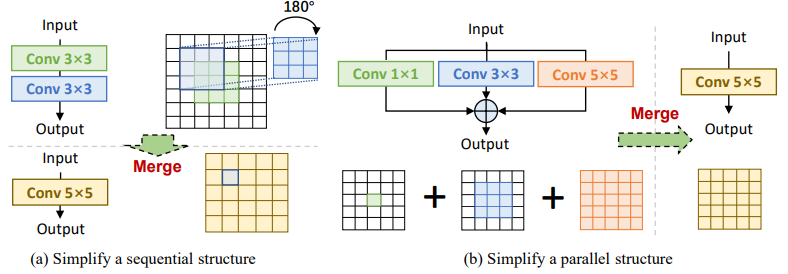

### 3. 동적 라벨 할당 전략 (Coarse-to-Fine Dynamic Label Assignment)


기존 YOLO 모델이 고정된 라벨 할당을 사용하는 반면, YOLOv7은 훈련 중 객체의 크기나 모양에 따라 동적으로 라벨(ground truth)을 할당하여 학습 효율을 높입니다.

초반부는 coarse(대략적인) 라벨을 할당하고, 후반부 학습에서 점진적으로 fine(정밀한) 라벨로 변환합니다.

이런 동적 할당으로, 객체가 다양한 크기와 모양을 갖는 데이터에 더 잘 적응하고 높은 정확도를 얻을 수 있습니다.

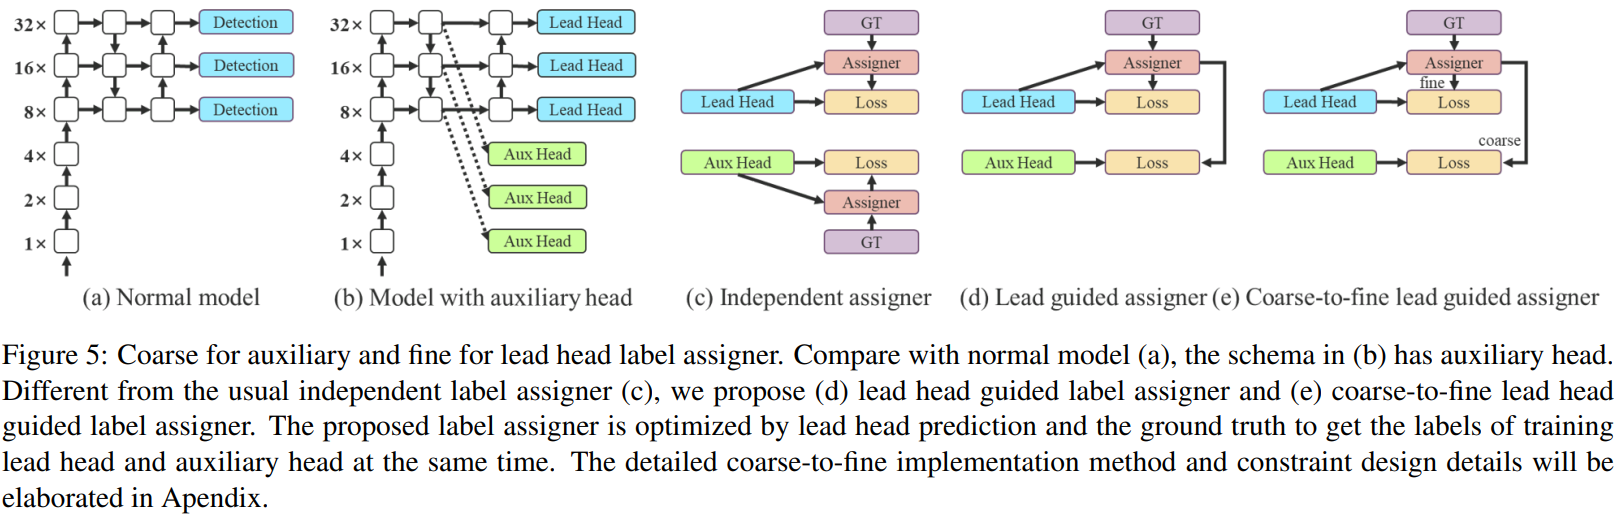

### 4. Trainable Bag-of-Freebies


모델 구조 자체를 변경하지 않으면서도 성능을 높일 수 있는 다양한 "무료" 기법들(학습 트릭 등)을 학습 가능하게 적용했습니다.

MixUp, Mosaic, Random affine 등 데이터 증강 기법

**Auxiliary heads(보조 헤드)**를 추가하여 특징 학습을 돕고, 최적화를 더 수월하게 만듭니다.

손실 함수를 더 효율적으로 구성하여 수렴을 빠르게 합니다.

이런 기법들이 "학습 가능(Trainable)"하도록 모델 설계에 통합되어, 성능 향상을 자연스럽게 유도합니다.

### 5. Anchor-free & Anchor-based 통합 전략


YOLOv7은 Anchor 기반 방법과 Anchor-free 방법의 장점을 결합하여 검출 성능을 높였습니다.

Anchor 기반 방법의 정확한 박스 회귀(box regression) 능력과 Anchor-free 방법의 높은 generalization(일반화)을 동시에 활용합니다.

이를 통해 다양한 환경에서도 안정적이고 높은 정확도의 검출 성능을 얻을 수 있게 되었습니다.

### 6. 스케일러블한 네트워크 디자인


YOLOv7은 다양한 환경(모바일, 엣지, 클라우드 등)에 맞게 네트워크 크기를 쉽게 확장 또는 축소(scale-up/down) 할 수 있도록 설계되었습니다.

작은 모델(v7-tiny 등)부터 큰 모델(v7-X 등)까지 일관된 설계를 유지하면서도 뛰어난 성능을 보여줍니다.

이러한 네트워크 구조의 유연성이 다양한 응용 환경에 빠르게 적용될 수 있게 합니다.

## YOLOv7-tiny 모델을 VOC dataset으로 훈련하기

### 1. 환경 설정 및 모델 준비

In [1]:
# YOLOv7 저장소 클론 및 의존성 설치
!git clone https://github.com/jetsonai/yolov7.git

# 추가 패키지 설치
!pip install onnx onnxruntime-gpu

Cloning into 'yolov7'...
remote: Enumerating objects: 665, done.
remote: Total 665 (delta 0), reused 0 (delta 0), pack-reused 665 (from 1)
Receiving objects: 100% (665/665), 114.77 MiB | 20.52 MiB/s, done.
Resolving deltas: 100% (328/328), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 109.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.2/283.2 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.3 MB/s eta 0:00:00


### 2. VOC 데이터셋 다운로드 및 준비

In [2]:
# VOC 데이터셋 다운로드
!pip install gdown
!gdown 1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
!tar -xf VOCtrainval_11-May-2012.tar
!rm VOCtrainval_11-May-2012.tar

Downloading...
From (original): https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB
From (redirected): https://drive.google.com/uc?id=1w_WBizEt2e_u6T9iY-hkwA-fIVsJktbB&confirm=t&uuid=d9824b33-66c1-4b0f-bd8d-dc3ce3732165
To: /content/VOCtrainval_11-May-2012.tar
100% 2.00G/2.00G [00:08<00:00, 238MB/s]


In [3]:
# 데이터셋 구조 확인
!ls VOCdevkit/VOC2012/

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject


### 3. 데이터셋을 YOLO 형식으로 변환


실습하고 있는 데이터셋은 라벨링이 xml 파일 포맷으로 제공되며, 해당 포맷은 YOLOv7을 활용해 객체 인식 신경망을 훈련할 때 사용할 수 있는 파일 포맷이 아닙니다.

convert2Yolo라고 하는 깃허브 저장소에서 Pascal VOC 데이터셋의 xml 파일 형태를 YOLOv11을 통한 훈련에 사용할 수 있도록 변환하는 기능을 제공합니다. 이를 활용해 xml 파일 포맷을 txt 파일 포맷으로 변환하겠습니다.

이 과정에 앞서 다음과 같이 Pascal VOC 데이터셋의 클래스 리스트가 있는 파일을 생성합니다.

In [4]:
classes = ["aeroplane\n", "bicycle\n", "bird\n", "boat\n", "bottle\n",
           "bus\n", "car\n", "cat\n", "chair\n", "cow\n", "diningtable\n",
           "dog\n", "horse\n", "motorbike\n", "person\n", "pottedplant\n",
           "sheep\n", "sofa\n", "train\n", "tvmonitor"]
with open("/content/vocnames.txt", 'w') as f:
    f.writelines(classes)

vocnames.txt 파일이 생성된 것을 확인한 후 다음과 같이 VOCdevkit/VOC2012 폴더 아래에 labels 폴더를 생성한 후 convert2Yolo 저장소를 활용해 xml 파일을 txt 파일로 변환합니다

In [5]:
!git clone https://github.com/ssaru/convert2Yolo.git
!cd convert2Yolo && python3 example.py --datasets VOC \
--img_path ../VOCdevkit/VOC2012/JPEGImages/ \
--label ../VOCdevkit/VOC2012/Annotations/ \
--convert_output_path ../VOCdevkit/VOC2012/JPEGImages/ \
--img_type ".jpg" \
--manifest_path ../ \
--cls_list_file ../vocnames.txt

Cloning into 'convert2Yolo'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 215 (delta 38), reused 35 (delta 35), pack-reused 172 (from 1)
Receiving objects: 100% (215/215), 994.67 KiB | 18.77 MiB/s, done.
Resolving deltas: 100% (95/95), done.

VOC Parsing:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (17125/17125)  Complete


YOLO Saving:   |████████████████████████████████████████| 100.0% (17125/17125)  Complete



다운로드 완료 후 훈련을 위한 이미지가 있는 폴더의 경로는 아래와 같습니다.

/content/VOCdevkit/VOC2012/JPEGImages/

YOLOv11을 통한 객체 인식 신경망을 훈련하기 위해 각 이미지 내 객체의 위치가 라벨링되어 있는 텍스트 파일은 이미지와 같은 폴더에 있습니다.

YOLOv11에서 훈련할 때 이미지와 같은 경로에 이미지와 동일한 이름의 라벨링 된 텍스트 파일이 있어야만 훈련을 수행할 수 있습니다. 구체적인 파일 구조는 아래와 같습니다.

```
$Object_Detection_Dataset/
                         ┗ 1.png
                         ┗ 1.txt
                         ┗ 2.jpg
                         ┗ 2.txt
```

이제 데이터를 훈련 데이터와 검증 데이터로 나누겠습니다.

In [6]:
import os
import shutil
from tqdm import tqdm
data_root = "/content/VOCData"
val_root = os.path.join(data_root, "val")
train_root = os.path.join(data_root, "train")
os.makedirs(val_root, exist_ok=True)
os.makedirs(train_root, exist_ok=True)

with open("/content/manifest.txt") as f:
    files = f.readlines()

for idx, img_path in tqdm(enumerate(files)):
    img_src = img_path.split('\n')[0]
    txt_src = os.path.splitext(img_src)[0] + ".txt"
    img_name = os.path.split(img_src)[-1]
    text_name = os.path.split(txt_src)[-1]
    if idx % 10 < 3:
        img_dst = os.path.join(val_root, img_name)
        text_dst = os.path.join(val_root, text_name)
    else:
        img_dst = os.path.join(train_root, img_name)
        text_dst = os.path.join(train_root, text_name)
    shutil.copy2(img_src, img_dst)
    shutil.copy2(txt_src, text_dst)

17125it [00:10, 1669.00it/s]


### 4. 데이터셋 구성 파일 생성

In [7]:
text_lines = """
train: /content/VOCData/train # train images (relative to 'yolov7')
val: /content/VOCData/val # val images (relative to 'yolov7')
# test: # optional

# number of classes
nc: 20

# class names
names: [ 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
         'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
         'dog', 'horse', 'motorbike', 'person', 'pottedplant',
         'sheep', 'sofa', 'train', 'tvmonitor' ]"""
with open("/content/vocdata.yaml", 'w') as f:
    f.write(text_lines)

### 5. YOLOv7-tiny 모델 훈련

In [8]:
!cd /content/yolov7 && python train.py --img 320 --batch 32 --epochs 10 --data /content/vocdata.yaml --weights /content/yolov7/yolov7-tiny.pt --cache

2025-07-28 00:34:17.178922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753662857.200229    3440 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753662857.206540    3440 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-28 00:34:17.230529: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
YOLOR 🚀 7c2f406 torch 2.6.0+cu124 CUDA:0 (Tesla T4, 15095.0625MB)

Namespace(weights='/content/yolov7/yolov7-tiny.pt', cfg=''

훈련이 중지되었을 때 아래의 명령어를 통해 훈련을 이어서 수행할 수 있습니다.

In [ ]:
!cd /content/yolov7 && python train.py --resume

### 6. 모델 추론 및 시각화

추론할 이미지 다운로드

In [9]:
!cd /content && wget https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png

--2025-07-28 01:08:13--  https://raw.githubusercontent.com/JinFree/OpenCV_for_DeepLearning/3e8b5613ff76389b78d22c35b4e30678a887aca7/Data/image_01.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 830401 (811K) [image/png]
Saving to: ‘image_01.png’

image_01.png        100%[===================>] 810.94K  --.-KB/s    in 0.03s   

2025-07-28 01:08:13 (23.8 MB/s) - ‘image_01.png’ saved [830401/830401]



추론 수행

In [10]:
!python detect.py --weights /content/yolov7/runs/train/exp/weights/last.pt --conf 0.2 --img-size 640 --source /content/image_01.png

python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


### 7. 모델을 ONNX 형식으로 변환

In [11]:
!cd /content/yolov7 && python export.py --weights /content/yolov7/runs/train/exp/weights/last.pt --grid --end2end --simplify \
        --topk-all 100 --iou-thres 0.5 --conf-thres 0.2 --img-size 640 640 --max-wh 640

Import onnx_graphsurgeon failure: No module named 'onnx_graphsurgeon'
Namespace(weights='/content/yolov7/runs/train/exp/weights/last.pt', img_size=[640, 640], batch_size=1, dynamic=False, dynamic_batch=False, grid=True, end2end=True, max_wh=640, topk_all=100, iou_thres=0.5, conf_thres=0.2, device='cpu', simplify=True, include_nms=False, fp16=False, int8=False)
YOLOR 🚀 7c2f406 torch 2.6.0+cu124 CPU

Fusing layers... 
Model Summary: 200 layers, 6057889 parameters, 0 gradients
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

Starting TorchScript export with torch 2.6.0+cu124...
/content/yolov7/models/yolo.py:52: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the

모델을 로컬로 다운로드

In [12]:
from google.colab import files

In [13]:
!cp /content/yolov7/runs/train/exp/weights/last.pt yolov7-tiny-voc.pt
files.download('yolov7-tiny-voc.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!cp /content/yolov7/runs/train/exp/weights/last.onnx yolov7-tiny-voc.onnx
files.download('yolov7-tiny-voc.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 8. OpenCV 및 ONNX Runtime을 이용한 추론

추론에 필요한 전처리 / 추론 후 가시화에 필요한 후처리 함수

In [15]:
%%writefile yolo_utils.py
import random
import numpy as np
import cv2

names = [ 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
         'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
         'dog', 'horse', 'motorbike', 'person', 'pottedplant',
         'sheep', 'sofa', 'train', 'tvmonitor' ]
rng = np.random.default_rng(3)
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

def yolov7_letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

def yolov7_draw_detections(ori_images, dwdh, ratio, outputs):
    if len(outputs) == 0:
        return ori_images[0]

    for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
        image = ori_images[int(batch_id)]
        box = np.array([x0,y0,x1,y1])
        box -= np.array(dwdh*2)
        box /= ratio
        box = box.round().astype(np.int32).tolist()
        cls_id = int(cls_id)
        score = round(float(score),3)
        name = names[cls_id]
        color = colors[name]
        name += ' '+str(score)
        cv2.rectangle(image,box[:2],box[2:],color,2)
        cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)
    return image


Writing yolo_utils.py


추론을 수행하는 주요 함수

In [16]:
%%writefile yolov7_onnx.py
import time
import cv2
import numpy as np
import onnxruntime

from yolo_utils import yolov7_draw_detections, yolov7_letterbox

class Yolov7WithOnnx:

    def __init__(self, path):
        # Initialize model
        self.initialize_model(path)

    def __call__(self, image):
        return self.detect_objects(image)

    def initialize_model(self, path):
        # self.session = onnxruntime.InferenceSession(path, providers=onnxruntime.get_available_providers())
        self.session = onnxruntime.InferenceSession(path, providers=['CUDAExecutionProvider'])
        # Get model info
        self.get_input_details()
        self.get_output_details()

    def detect_objects(self, image):
        input_tensor = self.prepare_input(image)

        # Perform inference on the image
        self.outputs = self.inference(input_tensor)
        return self.outputs

    def prepare_input(self, image):
        self.img_height, self.img_width = image.shape[:2]

        input_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        input_img, self.ratio, self.dwdh = yolov7_letterbox(input_img, auto=False)

        # Resize input image
        input_img = cv2.resize(input_img, (self.input_width, self.input_height))

        # Scale input pixel values to 0 to 1
        input_img = input_img / 255.0
        input_img = input_img.transpose(2, 0, 1)
        input_tensor = input_img[np.newaxis, :, :, :].astype(np.float32)

        return input_tensor


    def inference(self, input_tensor):
        start = time.perf_counter()
        outputs = self.session.run(self.output_names, {self.input_names[0]: input_tensor})[0]

        print(f"Inference time: {(time.perf_counter() - start)*1000:.2f} ms")
        return outputs


    def draw_detections(self, image, draw_scores=True, mask_alpha=0.4):

        return yolov7_draw_detections([image.copy()], self.dwdh , self.ratio, self.outputs)

    def get_input_details(self):
        model_inputs = self.session.get_inputs()
        self.input_names = [model_inputs[i].name for i in range(len(model_inputs))]

        self.input_shape = model_inputs[0].shape
        self.input_height = self.input_shape[2]
        self.input_width = self.input_shape[3]

    def get_output_details(self):
        model_outputs = self.session.get_outputs()
        self.output_names = [model_outputs[i].name for i in range(len(model_outputs))]

if __name__ == '__main__':
    import cv2

    # model_path = "yolov7-tiny.onnx"
    model_path = "/content/yolov7/yolov7-tiny-voc.onnx"

    # Initialize YOLOv7 object detector
    yolo_detector = Yolov7WithOnnx(model_path)

    img_path = "/content/image_01.png"
    img = cv2.imread(img_path)

    # Detect Objects
    yolo_detector(img)
    # Draw detections
    combined_img = yolo_detector.draw_detections(img)
    cv2.imwrite("result.png", combined_img)

Writing yolov7_onnx.py


In [17]:
!python yolov7_onnx.py

Inference time: 996.04 ms


## 실습

로컬 환경에 python3과 onnx-runtime, opencv-python을 설치한 후 위 스크립트를 저장하여 직접 추론을 수행해보세요.